In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
class GradientBoostingClassifier:
    def __init__(self,n_clfs,learning_rate=0.1):
        self.n_clfs=n_clfs
        self.clfs=[]
        self.learning_rate=learning_rate
        self.initial_pred=None

    def _sigmoid(self,pred):
        return 1/(1+np.exp(-pred))

    def fit(self,X,y):
        positive_prob = np.mean(y)
        self.initial_pred=np.log(positive_prob/(1-positive_prob))
        pred = np.full(y.shape,self.initial_pred)

        for _ in range(self.n_clfs):
            prob_pred = self._sigmoid(pred)
            residual = y-prob_pred

            clf = DecisionTreeRegressor(max_depth=3)
            clf.fit(X,residual)
            self.clfs.append(clf)

            log_odds = np.sum(clf.predict(X))/np.sum(prob_pred*(1-prob_pred))
            pred += self.learning_rate*log_odds

    def predict(self,X):
        pred = np.full(X.shape[0],self.initial_pred)

        for clf in self.clfs:
            clf_pred = clf.predict(X)
            pred+=self.learning_rate*clf.predict(X)
        return (self._sigmoid(pred)>0.5).astype(int)     

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
    n_classes=2, n_clusters_per_class=2, class_sep=0.6,flip_y=0.1, random_state=42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
clf = GradientBoostingClassifier(n_clfs=100, learning_rate=0.1)
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

Training Data Score 0.84
Test Data Score 0.86


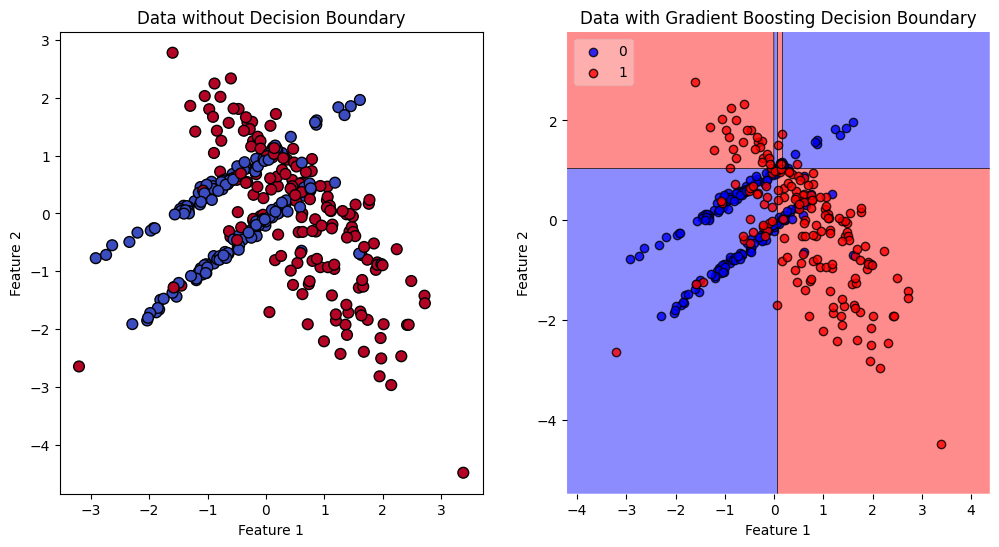

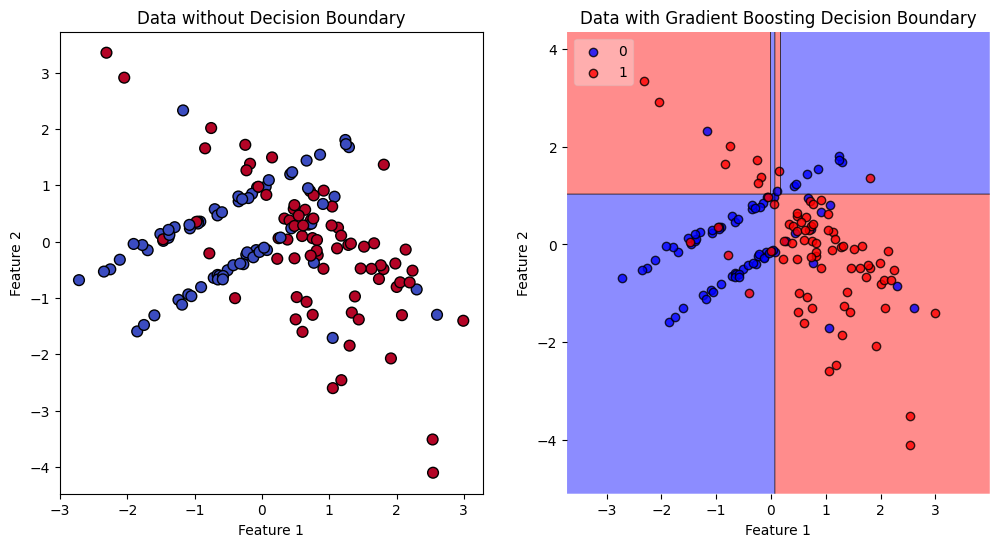

In [4]:
print('Training Data Score',accuracy_score(y_train,train_pred))
print('Test Data Score',accuracy_score(y_test,test_pred))

def plot_dataset(model,X,y):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.title("Data without Decision Boundary")
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=60)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

        

        plt.subplot(1, 2, 2)
        plt.title("Data with Gradient Boosting Decision Boundary")
        plot_decision_regions(X, y, clf=model, legend=2,markers='o',colors='blue,red')
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        
        plt.show()

plot_dataset(clf,X_train,y_train)
plot_dataset(clf,X_test,y_test)